In [1]:
import rospy
from sensor_msgs.msg import Image
from cv_bridge import CvBridge
import cv2
from IPython.display import display, clear_output
from PIL import Image as PILImage
import numpy as np

class CameraSubscriber:
    def __init__(self):
        rospy.init_node('jupyter_camera_sub', anonymous=True)

        self.bridge = CvBridge()
        self.latest_frame = None  # OpenCV 이미지 저장용

        # 입력 카메라 토픽 (원본)
        self.image_topic_in = "/camera/color/image_raw"
        # 출력 토픽 (처리된 영상)
        self.image_topic_out = "/camera/color/image_processed"

        # 구독 & 퍼블리셔 설정
        self.sub = rospy.Subscriber(self.image_topic_in, Image, self.image_callback)
        self.pub = rospy.Publisher(self.image_topic_out, Image, queue_size=1)

        print(f"[INFO] Subscribing to {self.image_topic_in}")
        print(f"[INFO] Publishing processed image to {self.image_topic_out}")

    def image_callback(self, msg):
        # ROS Image → OpenCV 이미지로 변환
        frame = self.bridge.imgmsg_to_cv2(msg, desired_encoding='bgr8')
        self.latest_frame = frame.copy()

        # opencv 이미지 확인을 위해 좌측 상단에 표시.
        cv2.putText(frame, "OpenCV Processed", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2)

        # ▶ 처리된 이미지를 새로운 토픽으로 퍼블리시
        out_msg = self.bridge.cv2_to_imgmsg(frame, encoding='bgr8')
        self.pub.publish(out_msg)

        # OpenCV 창에도 표시
        cv2.imshow("Camera - Processed", frame)
        cv2.waitKey(1)

        # ---- Jupyter Notebook 출력용 ----
        rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        pil_img = PILImage.fromarray(rgb)

        clear_output(wait=True)
        display(pil_img)


In [2]:
cam = CameraSubscriber()
print("[INFO] Camera subscriber created.")


[INFO] Subscribing to /camera/color/image_raw
[INFO] Publishing processed image to /camera/color/image_processed
[INFO] Camera subscriber created.


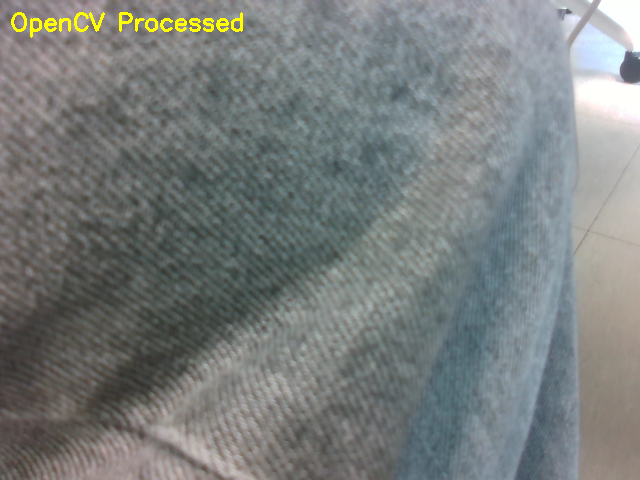

In [ ]:
rate = rospy.Rate(5)
print("[INFO] Jupyter Camera Subscriber Started. Waiting for images...")

while not rospy.is_shutdown():
    rate.sleep()

cv2.destroyAllWindows()
